<a href="https://colab.research.google.com/github/tanishaaraoo/AutonomousNavigation/blob/main/task1_Tanisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

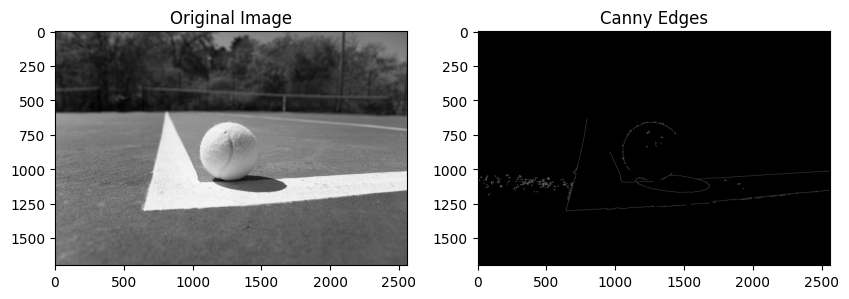

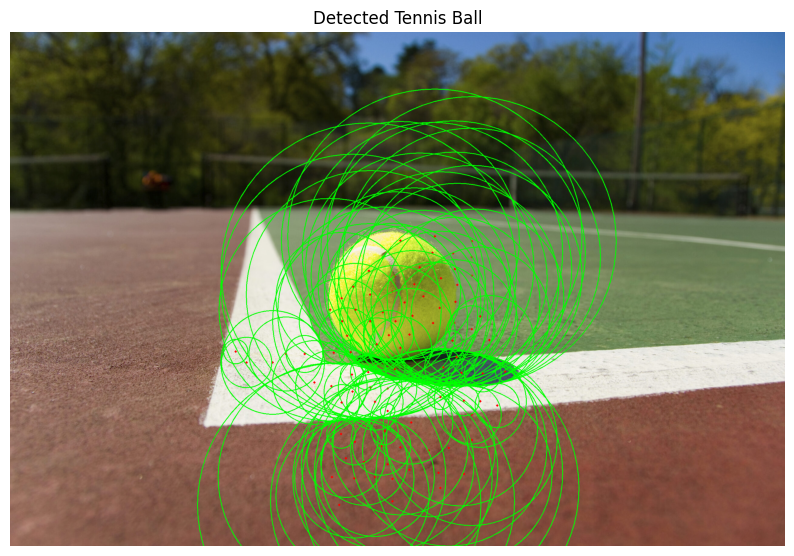

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Canny edge detection
def canny_edge_detection(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image was successfully loaded
    if image is None:
        print("Error: Could not load image.")
        return

    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

    # Display the original image and the edges side by side
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Canny Edges')
    plt.imshow(edges, cmap='gray')

    plt.show()

canny_edge_detection(image_path)

def detect_tennis_ball(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Apply edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Use Hough Circle Transform to detect the circle
    circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=2,
        minDist=50,
        param1=100,
        param2=30,
        minRadius=10,
        maxRadius=500
    )

    # If some circles are detected, draw them on the original image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)
    else:
        print("No circles were detected")

    # Plot the original image with detected circles
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Tennis Ball')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/tennis ball.jpg'  # Replace with your image path
detect_tennis_ball(image_path)
